In [1]:
import numpy as np
import itertools
import snap

import sys
sys.path.append('../')

import matplotlib.pyplot as plt

from graph_utils import *

# Network Characteristics [25 points]

Erdős-Rényi Random graph (G(n, m) random network): Generate a random instance of this model by using n = 5242 nodes and picking m = 14484 edges at random. Write code to construct instances of this model, i.e., do not call a SNAP function.

In [2]:
def create_erdos_renyi_random_graph(N: int, E: int, p: float):
    """
    Erdős-Rényi Random Graph
    
    This is a undirected graph that has nodes connected with random probability (binomial distribution)
    
    Args:
    - N : the number of nodes
    - E : the number of edges
    - p : probability of a node being connected another
    
    Return:
    - Undirected Random Graph that has N nodes and E edges
    """
    
    UG = snap.PUNGraph.New()
    
    nodes = range(N)
    for node in nodes:
        UG.AddNode(node)

    while UG.GetEdges() < E:
        for node in nodes:
            node_dst = np.random.binomial(n=N-1, p=p, size=1)[0]
            if node != node_dst: # self-edge (x)
                UG.AddEdge(node, int(node_dst))
            
            if UG.GetEdges() == E:
                break
        
    return UG

In [3]:
np.random.seed(223) # 223 is my birthday haha
er_UG = create_erdos_renyi_random_graph(N=5242, E=14484, p=0.5)

In [4]:
print('The number of nodes in a Erdős-Rényi Random Graph: ',er_UG.GetNodes())
print('The number of edges in a Erdős-Rényi Random Graph: ',er_UG.GetEdges())

The number of nodes in a Erdős-Rényi Random Graph:  5242
The number of edges in a Erdős-Rényi Random Graph:  14484


Small-World Random Network: Generate an instance from this model as follows: begin with n = 5242 nodes arranged as a ring, i.e., imagine the nodes form a circle and each node is connected to its two direct neighbors (e.g., node 399 is connected to nodes 398 and 400), giving us 5242 edges. Next, connect each node to the neighbors of its neighbors (e.g., node 399 is also connected to nodes 397 and 401). This gives us another 5242 edges. Finally, randomly select 4000 pairs of nodes not yet connected and add an edge between them. In total, this will make m = 5242 · 2 + 4000 = 14484 edges. Write code to construct instances of this model, i.e., do not call a SNAP function.

In [5]:
def create_small_world_random_graph(N: int, E: int, verbose=False):
    """
    Small-World Random Graph
    
    This is a undirected graph that has 3-steps as follow.
    - Step 1 : First, each node is connected to its two direct neighbors. Then, N edges is added in the graph.
    - Step 2 : Next, each node is connected to the neighbors of its neighbors. N edges is added in the graph as like before.
    - Step 3 : Finally, randomly select E-2N pairs of nodes not yet connected and add an edge between them.
    
    Args:
    - N : the number of nodes
    - E : the number of edges
    
    Return:
    - Undirected Random Graph that has N nodes and E edges
    
    """
    
    UG = snap.PUNGraph.New()
    
    nodes = range(N)
    
    for node in nodes:
        UG.AddNode(node)
    
    # step 1
    for node in nodes:
        if node == len(nodes)-1:
            UG.AddEdge(node, 0)
        else:
            UG.AddEdge(node, node+1)
    
    if verbose:
        print('The number of edges in step 1: ',UG.GetEdges())
    
    # step 2
    for node in nodes:
        if node == len(nodes)-2:
            UG.AddEdge(node, 0)
        elif node == len(nodes)-1:
            UG.AddEdge(node, 1)
        else:
            UG.AddEdge(node, node+2)
            
    if verbose:
        print('The number of edges in step 2: ',UG.GetEdges())
    
    # step 3
    while UG.GetEdges() < E:
        for node in nodes:
            node_dst = np.random.randint(low=0, high=len(nodes), size=1)[0]
            
            if node != node_dst: # self-edges (x)
                UG.AddEdge(node, int(node_dst))
            
            if UG.GetEdges() == E:
                break
                
    if verbose:
        print('The number of edges in step 2: ',UG.GetEdges())
            
    return UG

In [6]:
np.random.seed(223) # 223 is my birthday huhu
sw_UG = create_small_world_random_graph(N=5242, E=14484, verbose=True)

The number of edges in step 1:  5242
The number of edges in step 2:  10484
The number of edges in step 2:  14484


In [7]:
print('The number of nodes in a small-world random graph: ',sw_UG.GetNodes())
print('The number of edges in a small-world random graph: ',sw_UG.GetEdges())

The number of nodes in a small-world random graph:  5242
The number of edges in a small-world random graph:  14484


Real-World Collaboration Network: Download this undirected network from http://snap.stanford.edu/data/ca-GrQc.txt.gz. Nodes in this network represent authors of research papers on the arXiv in the General Relativity and Quantum Cosmology section. There is an edge between two authors if they have co-authored at least one paper together. Note that some edges may appear twice in the data, once for each direction. Ignoring repeats and self-edges, there are 5242 nodes and 14484 edges. (Note: Repeats are automatically ignored when loading an (un)directed graph with SNAP’s LoadEdgeList function).

In [8]:
rw_UG = snap.LoadEdgeList(snap.TUNGraph, "../data/ca-GrQc.txt",0,1)

In [9]:
print('The number of nodes in a real-world network: ',rw_UG.GetNodes())
print('The number of edges in a real-world network: ',rw_UG.GetEdges())

The number of nodes in a real-world network:  5242
The number of edges in a real-world network:  14496


In [10]:
print('The number of self-edges in a real-world network: ', rw_UG.CntSelfEdges())

The number of self-edges in a real-world network:  12


`snap.TUNGraph` cannot ingore self-edges. Therefore, I remove self-edges.

In [11]:
rw_UG.DelSelfEdges()
print('The number of edges in a real-world network: ',rw_UG.GetEdges())

The number of edges in a real-world network:  14484


## Degree Distribution [12 points]

Generate a random graph from both the Erdős-Rényi (i.e., G(n, m)) and Small-World models and read in the collaboration network. Delete all of the self-edges in the collaboration network (there should be 14,484 total edges remaining). Plot the degree distribution of all three networks in the same plot on a log-log scale. In other words, generate a plot with the horizontal axis representing node degrees and the vertical axis representing the proportion of nodes with a given degree (by “log-log scale” we mean that both the horizontal and vertical axis must be in logarithmic scale). In one to two sentences, describe one key difference between the degree distribution of the collaboration network and the degree distributions of the random graph models.

TODO
1. collaboration network를 읽으라는게 무슨말이지 -> real world network
2. degree의 proportion을 계산하는게 맞는건가 -> 그냥 log scale만 하는게 맞는듯

In [12]:
er_deg_df = pd.DataFrame({'deg':[item.GetVal1() for item in er_UG.GetDegCnt()],
                          'cnt':[item.GetVal2() for item in er_UG.GetDegCnt()]})

sw_deg_df = pd.DataFrame({'deg':[item.GetVal1() for item in sw_UG.GetDegCnt()],
                          'cnt':[item.GetVal2() for item in sw_UG.GetDegCnt()]})

rw_deg_df = pd.DataFrame({'deg':[item.GetVal1() for item in rw_UG.GetDegCnt()],
                          'cnt':[item.GetVal2() for item in rw_UG.GetDegCnt()]})

# the proportion of nodes with a given degree
# er_deg_df['p'] = er_deg_df['cnt'] / er_deg_df['cnt'].sum(axis=0)
# sw_deg_df['p'] = sw_deg_df['cnt'] / sw_deg_df['cnt'].sum(axis=0)
# rw_deg_df['p'] = rw_deg_df['cnt'] / rw_deg_df['cnt'].sum(axis=0)

Text(0, 0.5, 'log(the number of degree)')

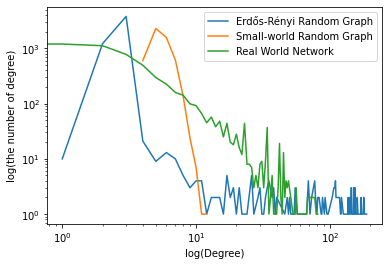

In [13]:
plt.loglog('deg', 'cnt', data=er_deg_df)
plt.loglog('deg', 'cnt', data=sw_deg_df)
plt.loglog('deg', 'cnt', data=rw_deg_df)
plt.legend(['Erdős-Rényi Random Graph','Small-world Random Graph','Real World Network'])
plt.xlabel('log(Degree)')
plt.ylabel('log(the number of degree)')

## Clustering Coefficient [13 points]

In [14]:
def calc_clustering_coef(G):
    """
    Calculate clustering coefficient of a undirected graph
    
    Args:
    - G: Graph class i.e. PUNGraph
    
    Return:
    - C: Clustering coefficient
    """
    
    c_i_lst = []
    
    for NI in G.Nodes():
        # get k_i
        k_i = NI.GetDeg()

        # get e_i
        nbr_lst = []
        for idx in range(k_i):
            nbr_lst.append(NI.GetNbrNId(idx))

        if len(nbr_lst) < 2:
            e_i = 0
        else:
            e_i = []
            for pair_node in itertools.combinations(nbr_lst, r=2):
                e_i.append(G.IsEdge(pair_node[0], pair_node[1]))
            e_i = np.sum(e_i)    

        # get c_i
        if e_i == 0:
            c_i = 0
        else:
            c_i = 2*e_i / (k_i * (k_i - 1))

        c_i_lst.append(c_i)

    C = np.sum(c_i_lst) / G.GetNodes()

    return C

In [15]:
print('The Clustering Coefficient of Erdős-Rényi Random Graph: ',calc_clustering_coef(er_UG))
print('The Clustering Coefficient of Erdős-Rényi Random Graph: ', er_UG.GetClustCf(-1))

The Clustering Coefficient of Erdős-Rényi Random Graph:  0.04559557590235959
The Clustering Coefficient of Erdős-Rényi Random Graph:  0.045595575902359874


In [16]:
print('The Clustering Coefficient of Small-world Random Graph: ',calc_clustering_coef(sw_UG))
print('The Clustering Coefficient of Small-world Random Graph: ', sw_UG.GetClustCf(-1))

The Clustering Coefficient of Small-world Random Graph:  0.26844973141234113
The Clustering Coefficient of Small-world Random Graph:  0.2684497314123356


In [17]:
print('The Clustering Coefficient of Real World Network: ',calc_clustering_coef(rw_UG))
print('The Clustering Coefficient of Real World Network: ', rw_UG.GetClustCf(-1))

The Clustering Coefficient of Real World Network:  0.5296358110521362
The Clustering Coefficient of Real World Network:  0.5296358110521371


# Structural Roles: Rolx and ReFex [25 points]

n this problem, we will explore the structural role extraction algorithm Rolx and its recursive feature extraction method ReFex. As part of this exploration, we will work with a dataset rep- resenting a scientist co-authorship network, which can be dowloaded at http://www-personal. umich.edu/~mejn/netdata/netscience.zip. 1 Although the graph is weighted, for simplicity we treat it as undirected and unweighted in this problem.

Feature extraction consists of two steps; we first extract basic local features from every node, and we subsequently aggregate them along graph edges so that global features are also obtained. Collectively, feature extraction constructs a matrix V ∈ R n×f where for each of the n nodes we have f features to cover local and global information. Rolx extracts node roles from that matrix.

In [18]:
FIn = snap.TFIn("../saved_graph/hw1-q2.graph")
sci_G = snap.TUNGraph.Load(FIn)

## Basic Features [5 points]

We begin by loading the graph G provided in the bundle and computing three basic features for the nodes. For each node v, we choose 3 basic local features (in this order):

In [19]:
def ext_egonet_features(G, v):
    """
    Extract egonet features of node v
    
    Args:
    - G: Graph class
    - v: node id
    
    Return: 
    - deg_v: the degree of node v
    - egonet_deg_v: the number of edges in the egonet of node v
    - egonet_edge_v: the number of edges that connect the egonet of node v and the rest of the graph
    """

    # get the degree of node v
    deg_lst = [NI.GetDeg() for NI in G.Nodes()]
    deg_v = deg_lst[v]

    # get the number of edges that connect the egonet of node v and the rest of the graph
    egonet_v, egonet_edge_v = G.GetEgonet(v)

    # get the degree in the egonet of node v
    ids = [NI.GetId() for NI in egonet_v.Nodes()]
    egonet_deg_v = []
    for pair_node in itertools.combinations(ids, r=2):
            egonet_deg_v.append(G.IsEdge(pair_node[0], pair_node[1]))
    
    egonet_deg_v = np.sum(egonet_deg_v)
        
    return deg_v, egonet_deg_v, egonet_edge_v

1. the degree of v, i.e., deg(v);

2. the number of edges in the egonet of v, where egonet of v is defined as the subgraph of G
induced by v and its neighborhood;

3. the number of edges that connect the egonet of v and the rest of the graph, i.e., the number of edges that enter or leave the egonet of v.

In [20]:
def calc_cos_sim(x, y):
    """
    Calcuate cosine similarity of x and y
    
    Args:
    - x: vector
    - y: vector
    
    Return:
    - cos_sim: cosine similarity
    """
    
    x = np.array(x)
    y = np.array(y)
    
    if np.sqrt(np.sum(x**2)) == 0 or np.sqrt(np.sum(y**2)) == 0:
        return 0
    else:
        cos_sim = np.sum(x*y) / (np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2)))
        return cos_sim

We use Ṽ u to represent the vector of the basic features of node u. For any pair of nodes u and v, we can use cosine similarity to measure how similar two nodes are according to their feature vectors x and y

Compute the basic feature vector for the node with ID 9, and report the top 5 nodes that are most similar to node 9 (excluding node 9). As a sanity check, no element in Ṽ 9 is larger than 10.

In [21]:
ids = [NI.GetId() for NI in sci_G.Nodes()]
egonet_features = dict([(v,ext_egonet_features(G=sci_G, v=v)) for v in ids])

In [43]:
cos_sim_lst = []
for id_v, egonet_feature in egonet_features.items():
    cos_sim = calc_cos_sim(x=egonet_features[9], y=egonet_features[id_v])
    cos_sim_lst.append(cos_sim)
cos_sim_lst = np.array(cos_sim_lst)

top5_index = cos_sim_lst.argsort()[-6:-1][::-1] # exclude self cos-sim
print('The top 5 nodes that are most similar to node 9 (excluding node 9)')
for idx in top5_index:
    print(f'Node ID: {np.array(list(egonet_features.keys()))[idx]} Cosine Similarity: {cos_sim_lst[idx]}')

The top 5 nodes that are most similar to node 9 (excluding node 9)
Node ID: 415 Cosine Similarity: 0.9996157540684272
Node ID: 286 Cosine Similarity: 0.996343680627828
Node ID: 288 Cosine Similarity: 0.996343680627828
Node ID: 1054 Cosine Similarity: 0.9961182380000687
Node ID: 1336 Cosine Similarity: 0.9961182380000687


In [24]:
egonet_features[9]

(6, 10, 1)

## Recursive Features [8 points]

In this next step, we recursively generate some more features. We use mean and sum as aggregation functions.

Initially, we have a feature vector Ṽ u ∈ R 3 for every node u. In the first iteration, we concatenate the mean of all u’s neighbors’ feature vectors to Ṽ u , and do the same for sum, i.e.,

![Screenshot from 2021-01-12 14-50-01](https://user-images.githubusercontent.com/37654013/104275166-a9ec1f00-54e5-11eb-96e3-31c20d856558.png)

where N (u) is the set of u’s neighbors in the graph. If N (u) = ∅, set the mean and sum to 0. K+1 After K iterations, we obtain the overall feature matrix V = Ṽ (K) ∈ R^3.


For this exercise, run K = 2 iterations, and report the top 5 nodes that are most similar to node 9 (excluding node 9). If there are ties, e.g. 4th, 5th, and 6th have the same similarity, report any of them to fill up the top-5 ranking. As a sanity check, the similarities between the reported nodes and node 9 are all greater than 0.9. [5 points]


Compare your obtained top 5 nodes with previous results from 2.1. In particular, are there common nodes? Are there different nodes? In one sentence, why would this change? [3 points]

In [37]:
def calc_recursive_features(G, v, feature_dict):
    """
    Calculate recursive features
    
    Args:
    - G: Graph class
    - v: node id
    - feature_dict: feature dictionary. key is a node id and value is a feature vector
    
    Return:
    - v_lst: feature vector of node v, 
           mean of feature vectors of neighbors of node v,
           sum of feature vectors of neighbors of node v 
           
    """
    v_lst = []
    
    egonet_v, egonet_edge_v = G.GetEgonet(v)
    ids = [NI.GetId() for NI in egonet_v.Nodes()]
    
    if len(ids) == 0:
        v_lst.extend(feature_dict[v])
        v_lst.extend([0,0,0])
        v_lst.extend([0,0,0])
    else:
        features_v_lst = []
        for id_ in ids:
            features_v_lst.append(feature_dict[id_])

        features_v_lst = np.array(features_v_lst)

        mean_features_v = np.mean(features_v_lst, axis=0)
        sum_features_v = np.sum(features_v_lst, axis=0)

        v_lst.extend(feature_dict[v])
        v_lst.extend(mean_features_v)
        v_lst.extend(sum_features_v)
        
    return v_lst

In [38]:
ids = [NI.GetId() for NI in sci_G.Nodes()]
egonet_features_k1 = dict([(v, calc_recursive_features(G=sci_G, v=v, feature_dict=egonet_features)) for v in ids])
egonet_features_k2 = dict([(v, calc_recursive_features(G=sci_G, v=v, feature_dict=egonet_features_k1)) for v in ids])

In [44]:
cos_sim_lst = []
for id_v, egonet_feature in egonet_features.items():
    cos_sim = calc_cos_sim(x=egonet_features_k2[9], y=egonet_features_k2[id_v])
    cos_sim_lst.append(cos_sim)
cos_sim_lst = np.array(cos_sim_lst)

top5_index = cos_sim_lst.argsort()[-6:-1][::-1] # exclude self cos-sim
print('The top 5 nodes that are most similar to node 9 (excluding node 9)')
for idx in top5_index:
    print(f'Node ID: {np.array(list(egonet_features.keys()))[idx]} Cosine Similarity: {cos_sim_lst[idx]}')

The top 5 nodes that are most similar to node 9 (excluding node 9)
Node ID: 973 Cosine Similarity: 0.9979486897341374
Node ID: 296 Cosine Similarity: 0.9977059355583994
Node ID: 25 Cosine Similarity: 0.9974799455305546
Node ID: 24 Cosine Similarity: 0.9974799455305546
Node ID: 7 Cosine Similarity: 0.9972974755155335


## Role Discovery [12 points]

In this part, we explore more about the graph according to the recursive feature vectors of nodes and node similarity.

(a) Produce a 20-bin histogram to show the distribution of cosine similarity between node 9 and any other node in the graph (according to their recursive feature vectors). Note here that the x-axis is cosine similarity with node 9, and the y-axis is the number of nodes. [3 points] 

According to the histogram, can you spot some groups / roles? How many can you spot? (Clue: look for the spikes! ) [2 points]

(array([128.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   4.,  18., 289., 126., 470., 276., 278.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

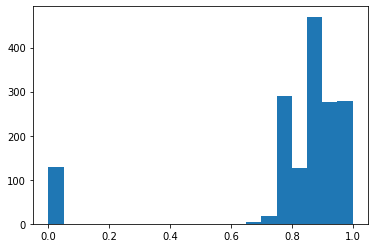

In [48]:
plt.hist(cos_sim_lst, bins=20)

(b) For these groups / roles in the cosine similarity histogram, take one node u from each group to examine the feature vector, and draw the subgraph of the node based on its feature vector. You can draw the subgraph by hand, or you can use libraries such as networkx or graphviz.


For these drawings, you should use the local features for u, and pay attention to the features aggregated from its 1-hop neighbors, but feel free to ignore further features if they are difficult to incorporate. Also, you should not draw nodes that are more than 3-hops away from u. [6 points]


Briefly argue how different structural roles are captured in 1-2 sentences. [1 point]

TODO
- png파일로 안나오고 dot으로 나옴

In [49]:
labels = {}
egonet_v, _ = sci_G.GetEgonet(9)
for NI in egonet_v.Nodes():
    labels[NI.GetId()] = str(NI.GetId())

In [51]:
egonet_v.DrawGViz(snap.gvlDot, "sci_G_node9.png"," ",labels)

# Community detection using the Louvain algorithm [25 points]

## Modularity gain when an isolated node moves into a community [4 points]

## Louvain algorithm on a 16 node network [10 points]

## Louvain algorithm on a 128 node network [10 points]

## What just happened? [1 point]

# Spectral clustering [25 points]

## A Spectral Algorithm for Normalized Cut Minimization: Foundations [10
points]

## Normalized Cut Minimization: Solving for the Minimizer [8 points]

## Relating Modularity to Cuts and Volumes [7 points]